<div style='background: #FF7B47; padding: 10px; border: thin solid darblue; border-radius: 5px; margin-bottom: 2vh'>
    
# Session 05 - Project Notebook


<div style='background: #FF7B47; padding: 10px; border: thin solid darblue; border-radius: 5px'>
     
## Overview 

In this lab, you will continue and complete the Covid project that you've started in session 04. Rather than scraping data from the web, however, you will work with three complex csv files. In order to deal with these files properly, you will no longer use Python's csv package but rather pandas - an extremely useful library/package that every data scientist is using on a daily basis. The first part of this session will introduce some basic pandas functionalities to ou before you will complete a set of more advanced data wrangling and visualization tasks.

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

## 1. Pandas
    
is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. In particular, it offers data structures and operations for manipulating numerical tables and time series. You can think of it like advanced version of Excel in Python :) 
    


In [1]:
# import all potential libraries you might want to use..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# we define this for convenience, as every state's url begins with this prefix
base_url = 'https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/'

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Data Frames
    
Data frames are the primary data structure in Pandas. Much like an Excel table, a data frame is a two-dimensional data structure, that also contains axes labels (every row and column is regarded to be an axis in pandas). You can also understand a data frame as a dict-like container for lists (i.e. columns - however, these columns or lists are called Series. We will talk more about those later). Below are some examples that should help you to understand how a data frame looks likes and how it is structured. Also, notice that you can `print()` a data frame or `display()` it.

In [3]:
# constructing a data frame a dictionary
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [4]:
# constructing data frame from a list
df_from_list = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=['a', 'b', 'c'])
display(df_from_list)

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Loading a csv as Data Frame.
    
Since .csv files are the most common way to store data, pandas has implemented a very fast and effective way to load such a file into a data frame. Notice that the structure of a csv and the structure of the data frame are very similar! Check out the example:

In [5]:
# your code here
df_oscars = pd.read_csv('data/example_oscar_age_female.csv')
display(df_oscars)

,Year,Age,Name,Movie
0,1929,37,Mary Pickford,Coquette
1,1930,28,Norma Shearer,The Divorcee\t
2,1931,63,Marie Dressler,Min and Bill
3,1932,32,Helen Hayes,The Sin of Madelon Claudet\t
4,1933,26,Katharine Hepburn,Morning Glory
...,...,...,...,...
82,2012,62,Meryl Streep,The Iron Lady
83,2013,22,Jennifer Lawrence,Silver Linings Playbook
84,2014,44,Cate Blanchett,Blue Jasmine
85,2015,54,Julianne Moore,Still Alice


In [6]:
# notice that it shows the first and last 5 entries if the data frame is larger than a predefined row size. 
# You can always just print the first 5, or a selected number of them

In [7]:
display(df_oscars.head(5))

,Year,Age,Name,Movie
0,1929,37,Mary Pickford,Coquette
1,1930,28,Norma Shearer,The Divorcee\t
2,1931,63,Marie Dressler,Min and Bill
3,1932,32,Helen Hayes,The Sin of Madelon Claudet\t
4,1933,26,Katharine Hepburn,Morning Glory


<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Series/Columns
    
One-dimensional ndarray with axis labels (including time series). A data frame can be divided into a numbers of series equal to the number of columns. Check out the example:

In [63]:
# your code here
actresses = df_oscars['Name']
print(actresses)
print(type(actresses))
print(actresses[1])

0          Mary Pickford
1          Norma Shearer
2         Marie Dressler
3            Helen Hayes
4      Katharine Hepburn
             ...        
82          Meryl Streep
83     Jennifer Lawrence
84        Cate Blanchett
85        Julianne Moore
86           Brie Larson
Name: Name, Length: 87, dtype: object
<class 'pandas.core.series.Series'>
 Norma Shearer


In [9]:
print(actresses.values)

[' Mary Pickford' ' Norma Shearer' ' Marie Dressler' ' Helen Hayes'
 ' Katharine Hepburn' ' Claudette Colbert' ' Bette Davis' ' Luise Rainer'
 ' Luise Rainer' ' Bette Davis' ' Vivien Leigh' ' Ginger Rogers'
 ' Joan Fontaine' ' Greer Garson' ' Jennifer Jones' ' Ingrid Bergman'
 ' Joan Crawford' ' Olivia de Havilland' ' Loretta Young' ' Jane Wyman'
 ' Olivia de Havilland' ' Judy Holliday' ' Vivien Leigh' ' Audrey Hepburn'
 ' Grace Kelly' ' Anna Magnani' ' Ingrid Bergman' ' Joanne Woodward'
 ' Susan Hayward' ' Simone Signoret' ' Elizabeth Taylor' ' Sophia Loren'
 ' Anne Bancroft' ' Patricia Neal' ' Julie Andrews' ' Julie Christie'
 ' Elizabeth Taylor' ' Katharine Hepburn' ' Katharine Hepburn'
 ' Barbra Streisand' ' Maggie Smith' ' Glenda Jackson' ' Jane Fonda'
 ' Liza Minnelli' ' Glenda Jackson' ' Ellen Burstyn' ' Louise Fletcher'
 ' Faye Dunaway' ' Diane Keaton' ' Jane Fonda' ' Sally Field'
 ' Sissy Spacek' ' Katharine Hepburn' ' Meryl Streep' ' Shirley MacLaine'
 ' Sally Field' ' Gerald

In [10]:
print(type(actresses.values))

<class 'numpy.ndarray'>


In [11]:
for actress in actresses:
    print(actress)

 Mary Pickford
 Norma Shearer
 Marie Dressler
 Helen Hayes
 Katharine Hepburn
 Claudette Colbert
 Bette Davis
 Luise Rainer
 Luise Rainer
 Bette Davis
 Vivien Leigh
 Ginger Rogers
 Joan Fontaine
 Greer Garson
 Jennifer Jones
 Ingrid Bergman
 Joan Crawford
 Olivia de Havilland
 Loretta Young
 Jane Wyman
 Olivia de Havilland
 Judy Holliday
 Vivien Leigh
 Audrey Hepburn
 Grace Kelly
 Anna Magnani
 Ingrid Bergman
 Joanne Woodward
 Susan Hayward
 Simone Signoret
 Elizabeth Taylor
 Sophia Loren
 Anne Bancroft
 Patricia Neal
 Julie Andrews
 Julie Christie
 Elizabeth Taylor
 Katharine Hepburn
 Katharine Hepburn
 Barbra Streisand
 Maggie Smith
 Glenda Jackson
 Jane Fonda
 Liza Minnelli
 Glenda Jackson
 Ellen Burstyn
 Louise Fletcher
 Faye Dunaway
 Diane Keaton
 Jane Fonda
 Sally Field
 Sissy Spacek
 Katharine Hepburn
 Meryl Streep
 Shirley MacLaine
 Sally Field
 Geraldine Page
 Marlee Matlin
 Cher
 Jodie Foster
 Jessica Tandy
 Kathy Bates
 Jodie Foster
 Emma Thompson
 Holly Hunter
 Jessica Lang

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Sorting 
    
The data frame structure allows to sort the entire table by the values in one column and still keep the row coherent. Of course, you can also sort columns, i.e. series manually. 

In [12]:
# sort a dataframe - the sort_values() method can be used both for data frames as well as for series objects.
display(df_oscars.sort_values(by=['Age']))

,Year,Age,Name,Movie
57,1987,21,Marlee Matlin,Children of a Lesser God
83,2013,22,Jennifer Lawrence,Silver Linings Playbook
12,1941,24,Joan Fontaine,Suspicion\t
23,1953,24,Audrey Hepburn,Roman Holiday
70,2000,25,Hilary Swank,Boys Don't Cry
...,...,...,...,...
77,2007,61,Helen Mirren,The Queen
82,2012,62,Meryl Streep,The Iron Lady
2,1931,63,Marie Dressler,Min and Bill
52,1982,74,Katharine Hepburn,On Golden Pond


<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Group_by & Aggregate
    
Another very useful method is the group_by method. Check out the examples:

In [13]:
l = [['class A', 23, 24], ['class A',32, 44], ['class B', 21, 13], ['class C', 52, 82]]
df = pd.DataFrame(l, columns=["class", "measure A", "measure B"], copy=True)
df

,class,measure A,measure B
0,class A,23,24
1,class A,32,44
2,class B,21,13
3,class C,52,82


In [14]:
df.groupby(by=["class"]).sum()

,measure A,measure B
class,,
class A,55,68
class B,21,13
class C,52,82


In [15]:
df.groupby(by=["class"]).sum()

,measure A,measure B
class,,
class A,55,68
class B,21,13
class C,52,82


In [16]:
# there are also fancy
df_oscars.groupby(by=["Age"]).agg({'Name': ','.join})

,Name
Age,
21,Marlee Matlin
22,Jennifer Lawrence
24,"Joan Fontaine, Audrey Hepburn"
25,"Jennifer Jones, Grace Kelly, Julie Christie, ..."
26,"Katharine Hepburn, Vivien Leigh, Barbra Strei..."
27,"Bette Davis, Luise Rainer, Sophia Loren, Liza..."
28,"Norma Shearer, Luise Rainer, Joanne Woodward,..."
29,"Ginger Rogers, Ingrid Bergman, Judy Holliday,..."
30,"Bette Davis, Olivia de Havilland, Hilary Swank"


<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Lab
    
In the 'data' folder there are three files containing county information about cases, deaths and population. (covid_confirmed_usafacts.csv, covid_deaths_usafacts.csv, covid_county_population_usafacts.csv). Follow the instructions in the following tasks to explore the
Explore these files and then load them using pandas. 
    
Next, come up with some questions you could ask the data set and answer using some preprocessing & data wrangling and, ultimately, visualizations. Note that the data for cases and deaths has a temporal dimension. Try to make use of that information.
    
For this task, we highly encourage you to work with pandas. We will give you an advanced introduction to pandas in session 5 if time allows it (depending on how comfortable you feel today in session 4). To solve the bonus task during session 4, you will need to study the pandas documentation yourself. 

<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Task 2.1

Load all three csv files and store them as data frames in the variables `df_cases`, `df_deaths`, `df_population`. Display the first 5 rows of each of these three data frames. Explore the columns of each data frame. Why are there 529 columns? How can we use those columns?

In [22]:
# your code here
import pandas as pd
import numpy as np

df_cases = pd.read_csv('data/covid_confirmed_usafacts.csv')
df_deaths = pd.read_csv('data/covid_deaths_usafacts.csv')
df_population = pd.read_csv('data/covid_county_population_usafacts.csv')

display(df_cases.head(5))
display(df_deaths.head(5))
display(df_population.head(5))

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,7241,7242,7242,7244,7244,7244,7244,7244,7247,7247
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,21868,21901,21901,21921,21921,21945,21945,21945,21985,21985
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,2345,2345,2345,2344,2344,2344,2344,2344,2345,2345
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,2685,2685,2685,2686,2686,2686,2686,2686,2687,2687


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,314,314,314,314,314,314,314,314,314,314
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,59,59,59,60,60,60,60,60,60,60
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,64,64,64,64,64,64,64,64,64,64


,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Task 2.2

Pick a random county and visualize the cases and deaths between 2020-01-22 and 2021-06-29. Use matplotlib to to draw a linechart with one line for cases and another one for deaths.

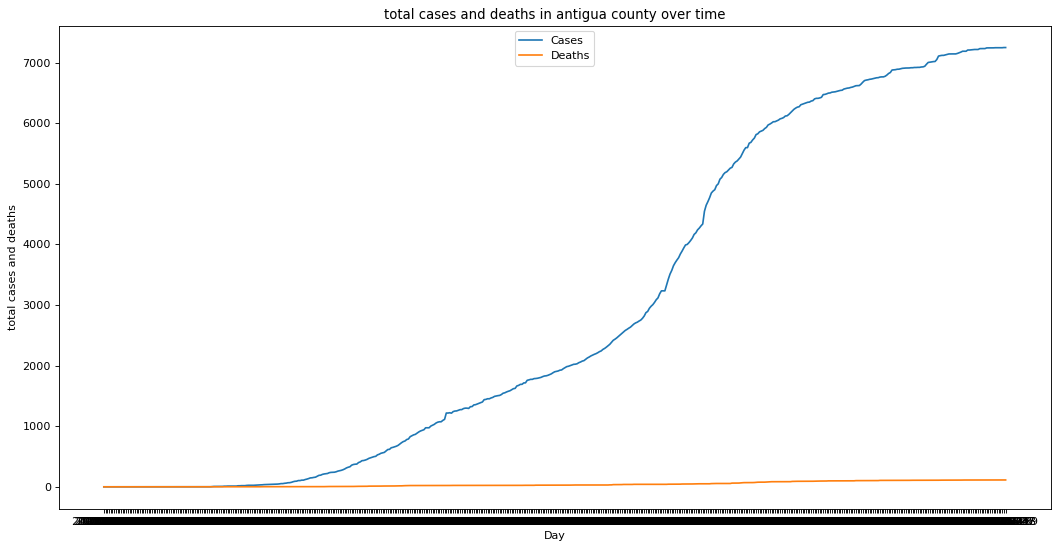

In [51]:
# your code here
from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)

cases = df_cases.loc[1]
cases = list(cases[4:])

deaths = df_deaths.loc[1]
deaths = list(deaths[4:])

days = [i for i in df_cases.columns[4:]]

plt.plot(days, cases, label='Cases')
plt.plot(days, deaths, label='Deaths')

plt.xlabel('Day')
plt.ylabel('total cases and deaths')
plt.title('total cases and deaths in antigua county over time')
plt.legend(loc='upper center')
plt.show()

<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Task 2.3

groupall three data frames by state and store the result in the variables `df_cases_agg`, `df_deaths_agg`, `df_population_agg`

In [55]:
df_states_agg = df_cases.groupby(by=["State"]).agg({'County Name': ','.join})
df_cases_agg = df_cases.groupby(by=["State"]).sum()

df_deaths_agg = df_deaths.groupby(by=["State"]).sum()
df_population_agg = df_population.groupby(by=["State"]).sum()

display(df_states_agg)

,County Name
State,
AK,"Statewide Unallocated,Aleutians East Borough ,..."
AL,"Statewide Unallocated,Autauga County ,Baldwin ..."
AR,"Statewide Unallocated,Arkansas County ,Ashley ..."
AZ,"Statewide Unallocated,Apache County ,Cochise C..."
CA,"Statewide Unallocated,Alameda County ,Alpine C..."
CO,"Statewide Unallocated,Adams County ,Alamosa Co..."
CT,"Statewide Unallocated,Fairfield County ,Hartfo..."
DC,"Statewide Unallocated,District of Columbia"
DE,"Statewide Unallocated,Kent County ,New Castle ..."


<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Task 2.4

write a function that takes a state alpha code as argument and that returns a timeline/chart for that state with the cases, deaths, case ratio (cases/population), and death ratio(deaths/population). 

In [62]:
from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)

def draw_state_timeline(state_alpha_code):
    '''your code here'''
    cases = df_cases_agg.loc[df_cases['State'] == state_alpha_code]
    deaths = df_deaths_agg.loc[df_cases['State'] == state_alpha_code]

    cases = list(cases[4:])
    deaths = list(deaths[4:])
    ratio = []
    for i in range(0, len(cases)):
        ratio.append(cases[i] / deaths[i])

    days = [i for i in df_cases.columns[4:]]

    plt.plot(days, cases, label="cases")
    plt.plot(days, deaths, label="deaths")
    plt.plot(days, ratio, label="cases/deaths")
    

    plt.xlabel('Day')
    plt.ylabel('total cases and deaths')
    plt.title(f'total cases in {state_alpha_code} over time')
    plt.legend(loc='upper left')
    plt.show()

draw_state_timeline('FL')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1280x640 with 0 Axes>

<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Task 2.5
write a function that takes a date string as argument and that returns a bar chart of 10 counties. These 10 counties should be the counties that have the highest number of cases on that particular date. TO solve this task, make sure to sort the dataframe accordingly each time you call the function.
    
    

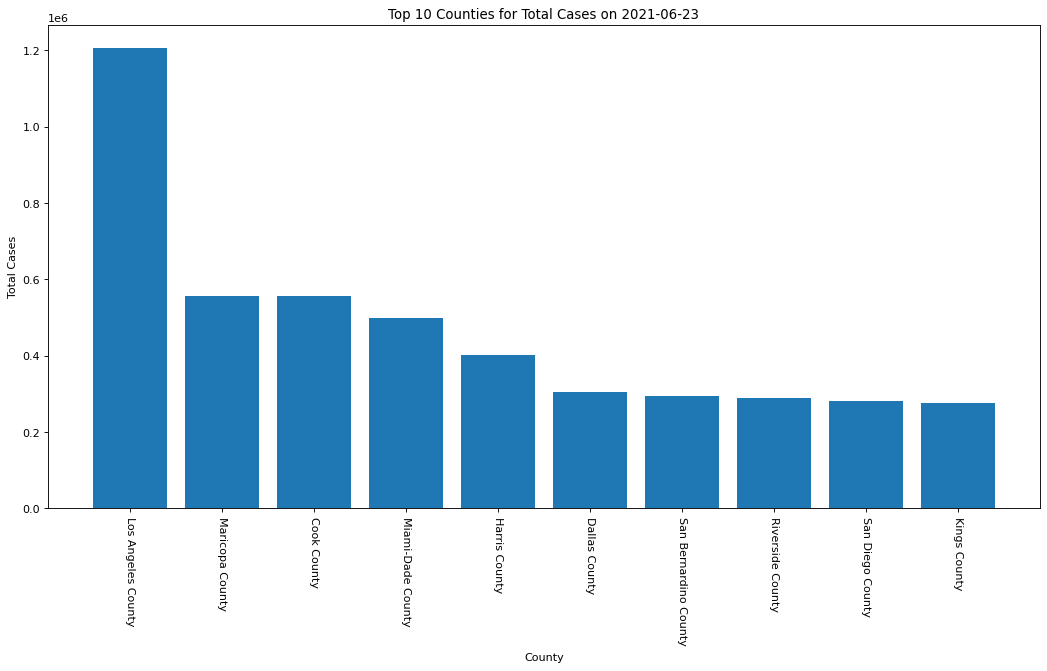

In [76]:
from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)

def draw_sorted_county_bars(date_string):
    '''your code here'''
    counties = []
    total_cases = []
    
    cases = df_cases.sort_values(by=[date_string], ascending=False, ignore_index=True)
    for i in range(0, 10):
        county_names = cases["County Name"]
        counties.append(county_names[i])
        
        county_cases = cases[date_string]
        total_cases.append(county_cases[i])
    plt.bar(counties, total_cases)
    
    plt.xlabel('County')
    plt.ylabel('Total Cases')
    plt.title(f'Top 10 Counties for Total Cases on {date_string}')
    plt.xticks(counties, rotation=270)
    
    plt.show()
        
draw_sorted_county_bars('2021-06-23')